# 42577 Airbnb analysis project

Jaime Guzman - S222025

## Section 1 - Introduction

For this project the following libraries will be used. To avoid the need to look for them **all** the libraries that are used in this project will be find here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Section 1.1 - Data Loading & Cleaning
The first thing that will be done is to load the data into a pandas dataframe and inspect the data for any anomaly that might require cleansing.

In [2]:
data = pd.read_csv('listings_CPH.csv')
print(data.shape)
data.head()

(13815, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,2022-06-21,1.08,1,0,4,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,2022-08-09,0.55,1,303,8,NaN
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,NaN,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2022-09-10,2.06,3,56,7,NaN
3,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,2022-08-04,0.16,1,59,2,NaN
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022-08-22,0.13,1,0,2,NaN


We can see that the data was loaded correctly, now it is necessary to check if the data has any abnormality and also to inspect the data type of each column to verify it's correct.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13815 entries, 0 to 13814
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13815 non-null  int64  
 1   name                            13815 non-null  object 
 2   host_id                         13815 non-null  int64  
 3   host_name                       13814 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   13815 non-null  object 
 6   latitude                        13815 non-null  float64
 7   longitude                       13815 non-null  float64
 8   room_type                       13815 non-null  object 
 9   price                           13815 non-null  int64  
 10  minimum_nights                  13815 non-null  int64  
 11  number_of_reviews               13815 non-null  int64  
 12  last_review                     

It seems that the data on the columns neighbourhood_group and license is not showing, it is a good idea to check for all unique values in these columns to verify that the data is all null. In case it is, then we can just delete the columns.

In [4]:
print(f'neighbourhood_group: {data.neighbourhood_group.unique()}')
print(f'license: {data.license.unique()}')

neighbourhood_group: [nan]
license: [nan]


Since our data is only null values we will delete it form our dataframe for now.

In [5]:
data.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,6983,Copenhagen 'N Livin',16774,Simon,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,2022-06-21,1.08,1,0,4
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,2022-08-09,0.55,1,303,8
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2022-09-10,2.06,3,56,7
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,2022-08-04,0.16,1,59,2
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022-08-22,0.13,1,0,2


Now we check for different statistical values that might help us discover outliers in our data.

In [6]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.381500e+04,1.381500e+04,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,12170.000000,13815.000000,13815.000000,13815.000000
mean,1.719385e+17,1.064145e+08,55.680569,12.557805,1205.878972,4.605574,18.571118,0.903816,4.400651,93.302642,5.451104
std,2.852538e+17,1.302801e+08,0.021088,0.033512,1433.143149,16.900153,36.402671,1.110754,21.298565,123.161958,11.373977
min,6.983000e+03,1.171800e+04,55.609510,12.435670,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.907962e+07,1.356383e+07,55.666110,12.540285,729.000000,2.000000,2.000000,0.230000,1.000000,0.000000,0.000000
50%,3.931542e+07,4.656301e+07,55.681190,12.555520,995.000000,3.000000,7.000000,0.530000,1.000000,20.000000,3.000000
75%,5.665348e+17,1.553486e+08,55.695770,12.580741,1368.500000,4.000000,20.000000,1.120000,1.000000,174.000000,6.000000
max,7.222925e+17,4.805803e+08,55.742800,12.651740,64900.000000,1111.000000,711.000000,24.020000,179.000000,365.000000,471.000000


We can see some interesting data from here. For example, the lowest price listed is 0, which doesn't make any sense. It would do good to look into this further to find information.

## Section 1.2 - Data Exploration

Here we are going dive further into the data. As we saw before, our price variable seems to have some issues, so we will start with that, but we will do the same analysis to all of our variables.

<AxesSubplot:xlabel='price', ylabel='Count'>

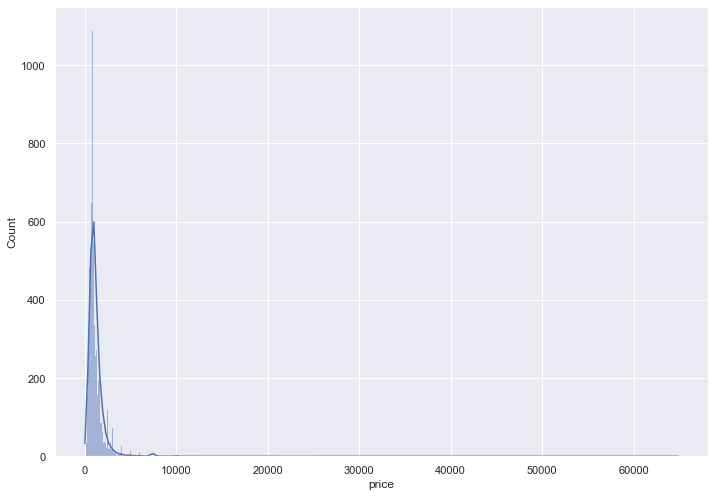

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=data, x='price', kde=True)

The situation with the price variable is surprising. We can see taht the mayority of pricings are at or near 0. It was expected to have some high priced rental locations, but the disparity between the lowest and highest priced rental is a little bit much. We shall now dive further into this analysis.

In [8]:
data.price.value_counts()

1000    656
1200    563
800     506
900     439
1500    425
       ... 
4400      1
198       1
3333      1
1787      1
347       1
Name: price, Length: 1689, dtype: int64

In [12]:
data[data['price'] == 0]['price'].count()

2

We find that the case of having alot of properties with value 0 is not the case, since most are priced in 1000. We will now do the same chart as above but only for the data that is less than 10000 to see the distribution of our data without the expensive outliers.

<AxesSubplot:xlabel='price', ylabel='Count'>

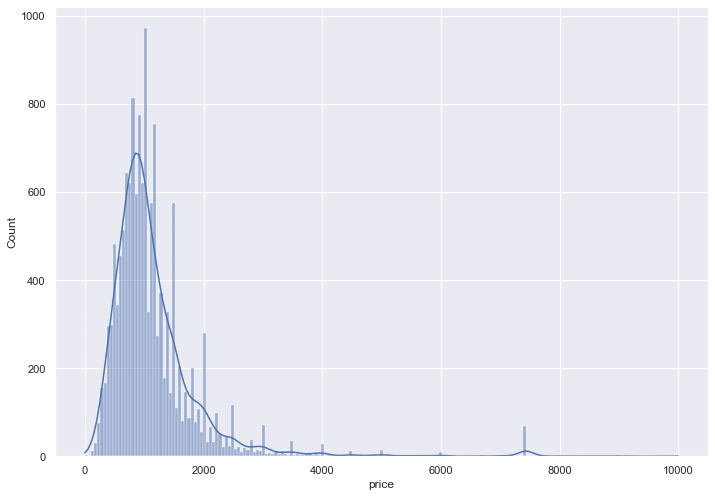

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataf = data[data['price'] < 10000]
sns.histplot(data=dataf, x='price', kde=True)

With the figure above we can now understand better the distribution of prices for the different airbnbs that are listes in Copenhagen. Now we want to find the outliers for all our variables, therefore we are going to implement a box plot for all our variables, which will help us see which variables have many outliers and which are distributed more normally.

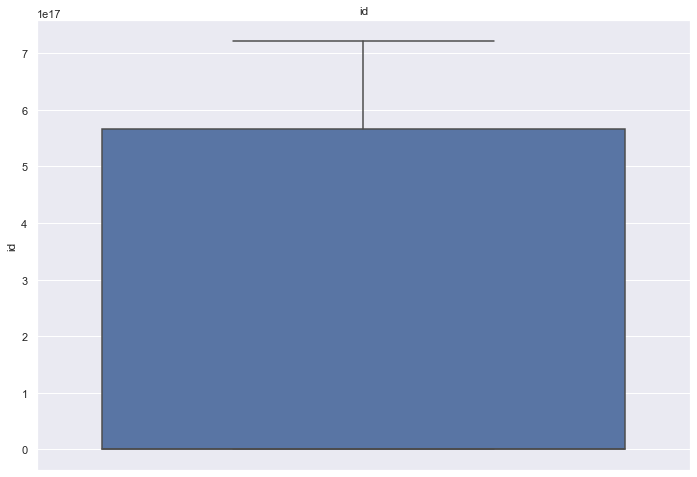

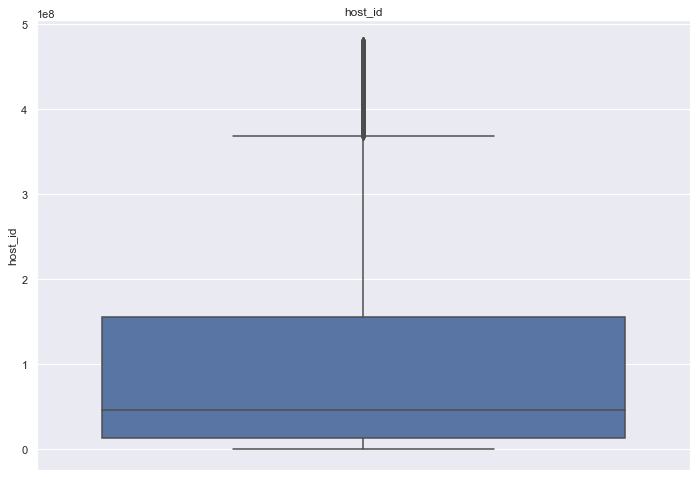

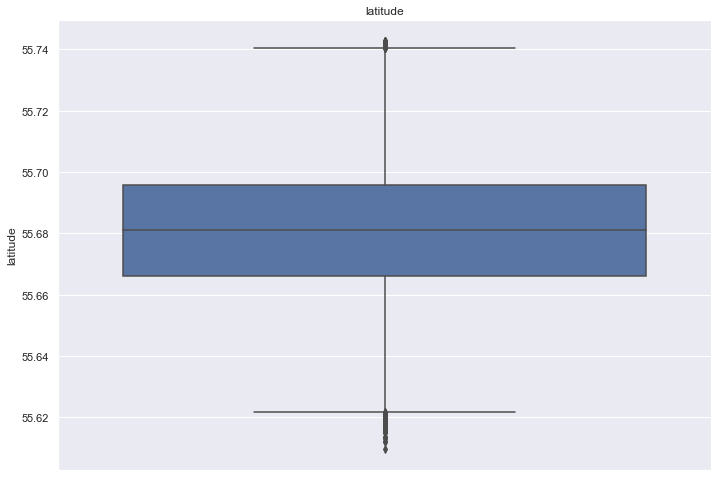

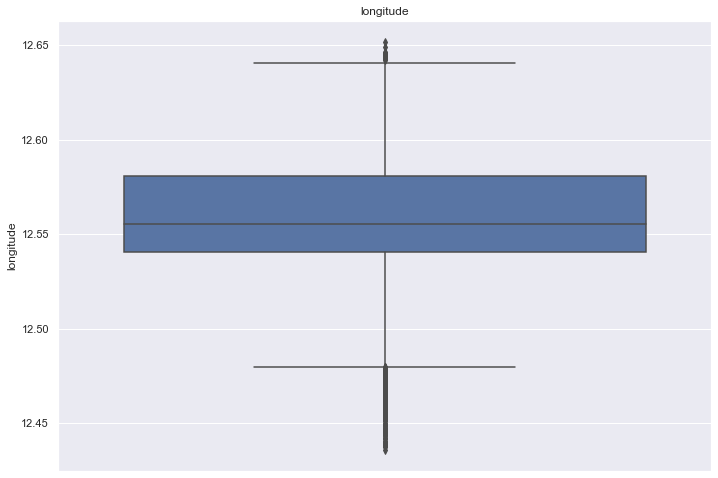

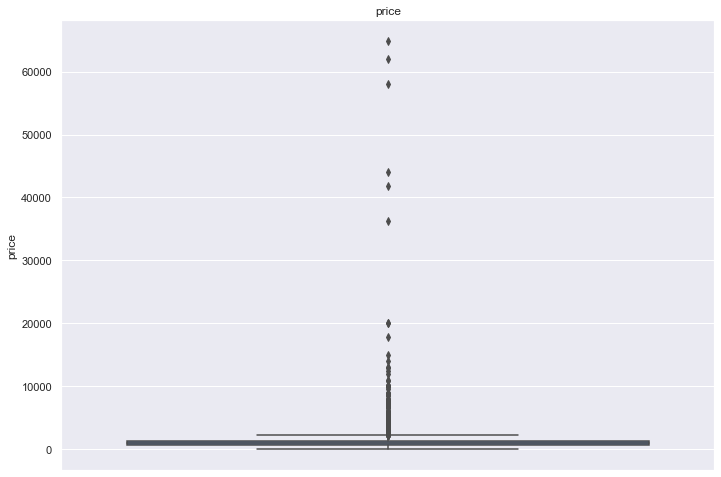

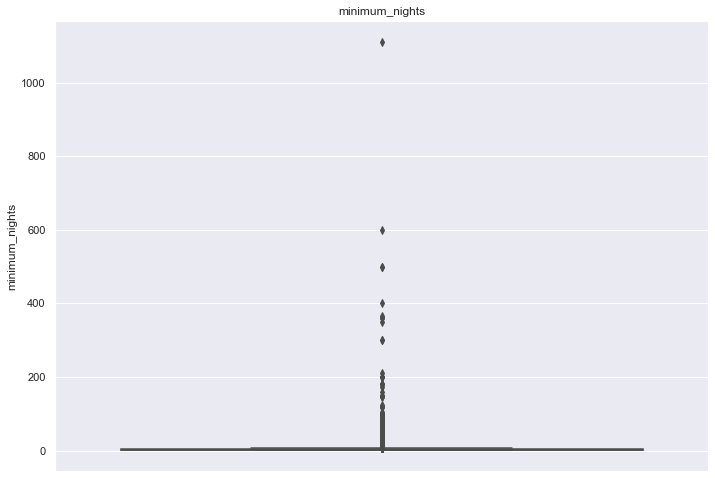

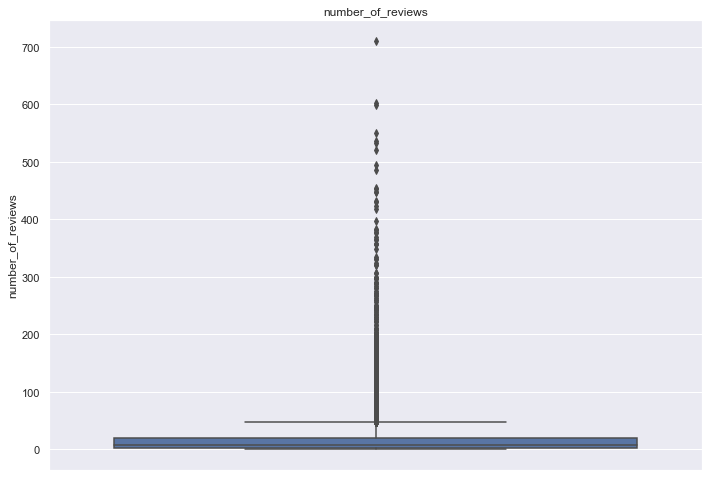

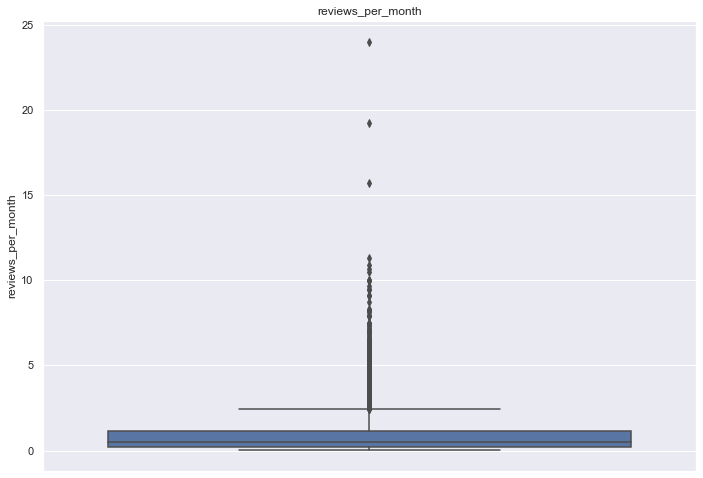

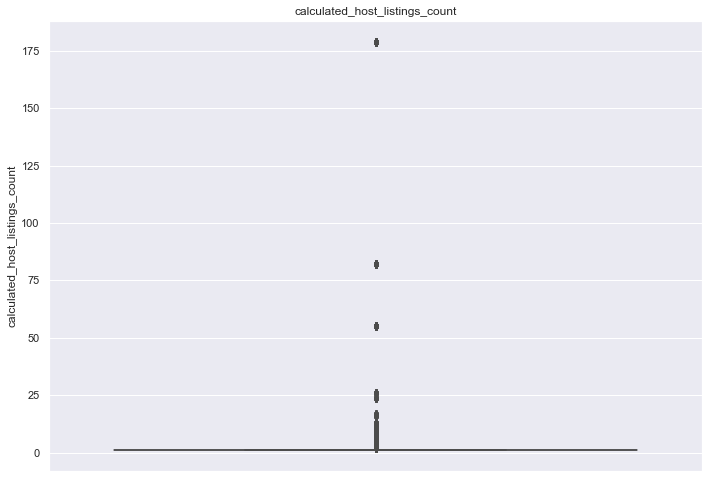

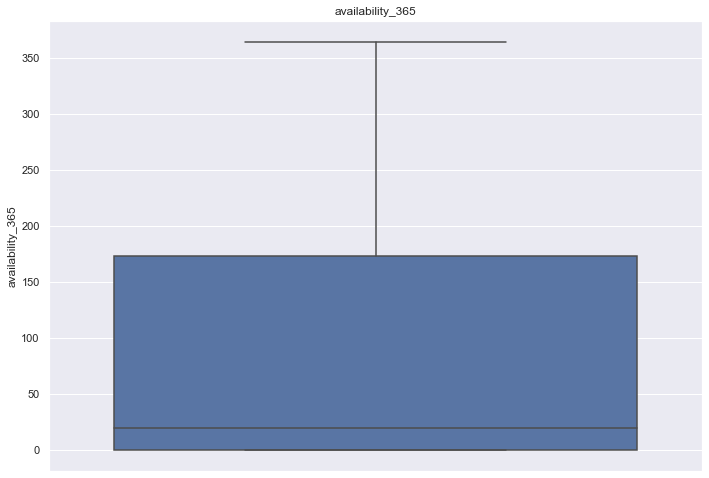

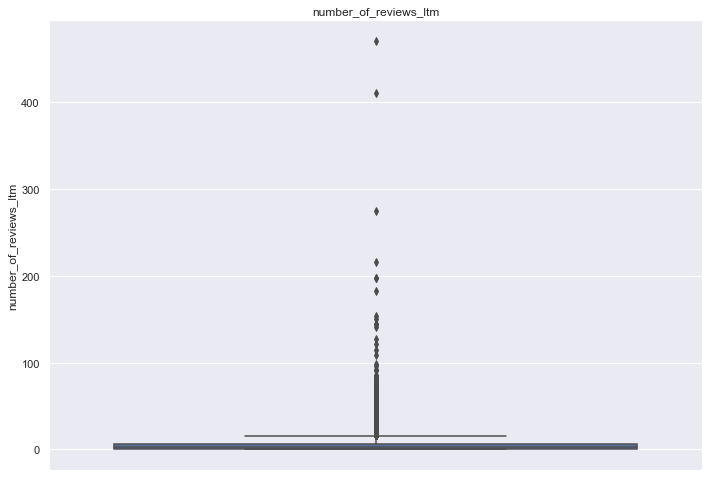

In [20]:
def plot_box(df, col):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.boxplot(data=df, y=col).set_title(col)
    plt.show()

for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        plot_box(data, col)

We can see some very interesting data in the plots above. The one that is most interesting is the minimum_nights variable, which is telling us there are some outliers that are asking for a minimum of 200 nights, with some asking for over 1000 nights. This are conditions that are not very common and invite many questions, such as what type of rental property is this or what are the asking prices when asking someone to live for almost a year (or 3 in the case of 1000+).

## Section 2 - Exploratory Components

Possible questions:
1. What type of rental properties are asking their tenants to stay for a minimum of over a month? This will also include the conditions of said properties, their location (if possible), as well as the price of staying there.
2. Which properties are the most popular and what makes them popular? (Popularity will be defined by the amount of reviews a property has as well as its overall rating.)

## Section 3 - Prediction Challenge

## Section 4 - Conclusions